In [80]:
# Importando Blibliotecas
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Lendo o arquivo
dataframe = pd.read_excel('Online_Retail.xlsx')
dataframe.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [82]:
# Renomeando as colunas
dataframe.columns = ['NumeroFatura','CodigoProduto','DescricaoProduto','Quantidade','DataFatura','PrecoUnitario','CodigoCliente','Pais']
dataframe.head()

,NumeroFatura,CodigoProduto,DescricaoProduto,Quantidade,DataFatura,PrecoUnitario,CodigoCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [83]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   NumeroFatura      541909 non-null  object        
 1   CodigoProduto     541909 non-null  object        
 2   DescricaoProduto  540455 non-null  object        
 3   Quantidade        541909 non-null  int64         
 4   DataFatura        541909 non-null  datetime64[ns]
 5   PrecoUnitario     541909 non-null  float64       
 6   CodigoCliente     406829 non-null  float64       
 7   Pais              541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [84]:
# Preparando os dados
dataframe = dataframe.dropna(subset=['CodigoCliente'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   NumeroFatura      406829 non-null  object        
 1   CodigoProduto     406829 non-null  object        
 2   DescricaoProduto  406829 non-null  object        
 3   Quantidade        406829 non-null  int64         
 4   DataFatura        406829 non-null  datetime64[ns]
 5   PrecoUnitario     406829 non-null  float64       
 6   CodigoCliente     406829 non-null  float64       
 7   Pais              406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [85]:
# Criando coluna ano_mes - Separando essas informações da coluna DataFatura para fazer a análise
dataframe['AnoMes'] = dataframe['DataFatura'].dt.strftime('%Y-%m')
dataframe.head()

,NumeroFatura,CodigoProduto,DescricaoProduto,Quantidade,DataFatura,PrecoUnitario,CodigoCliente,Pais,AnoMes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [86]:
# Criando Cohorts - Agrupando os clientes por mês de sua primeira compra
dataframe['Cohort'] = dataframe.groupby('CodigoCliente')['AnoMes'].transform('min')
dataframe.head()


,NumeroFatura,CodigoProduto,DescricaoProduto,Quantidade,DataFatura,PrecoUnitario,CodigoCliente,Pais,AnoMes,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12


In [87]:
# Agrupando os dados por Cohort e AnoMes
cohort1 = dataframe.groupby(['Cohort', 'AnoMes'])

# Contando o número de clientes únicos em cada grupo
cohort2 = cohort1.agg({'CodigoCliente': pd.Series.nunique})

cohort2.rename(columns={'CodigoCliente' : 'TotalUsuarios'}, inplace=True)

cohort2

TotalUsuarios
Cohort  AnoMes                
2010-12 2010-12            948
        2011-01            362
        2011-02            317
        2011-03            367
        2011-04            341
...                        ...
2011-10 2011-11             93
        2011-12             46
2011-11 2011-11            321
        2011-12             43
2011-12 2011-12             41

[91 rows x 1 columns]

In [88]:
# Criando a coluna PeriodoCohort
def cohort_period(dataframe):
    dataframe['PeriodoCohort'] = np.arange(len(dataframe)) + 1
    return dataframe


# Aplicando a função
cohort2 = cohort2.groupby(level=0).apply(cohort_period)

In [89]:
# Calculando o tamanho inicial do grupo (número total de usuários) para cada Cohort
CohortTamanhos = cohort2['TotalUsuarios'].groupby(level=0).first()

In [90]:
# Reindexando o DataFrame para garantir que o índice seja exclusivo
cohort2 = cohort2.groupby(['Cohort', 'PeriodoCohort']).first()

In [91]:
# Deslocando os valores da coluna TotalUsuarios na primeira linha de cada Cohort para que possamos dividi-los
RetencaoClientes = cohort2['TotalUsuarios'].unstack(0).divide(CohortTamanhos, axis=1)

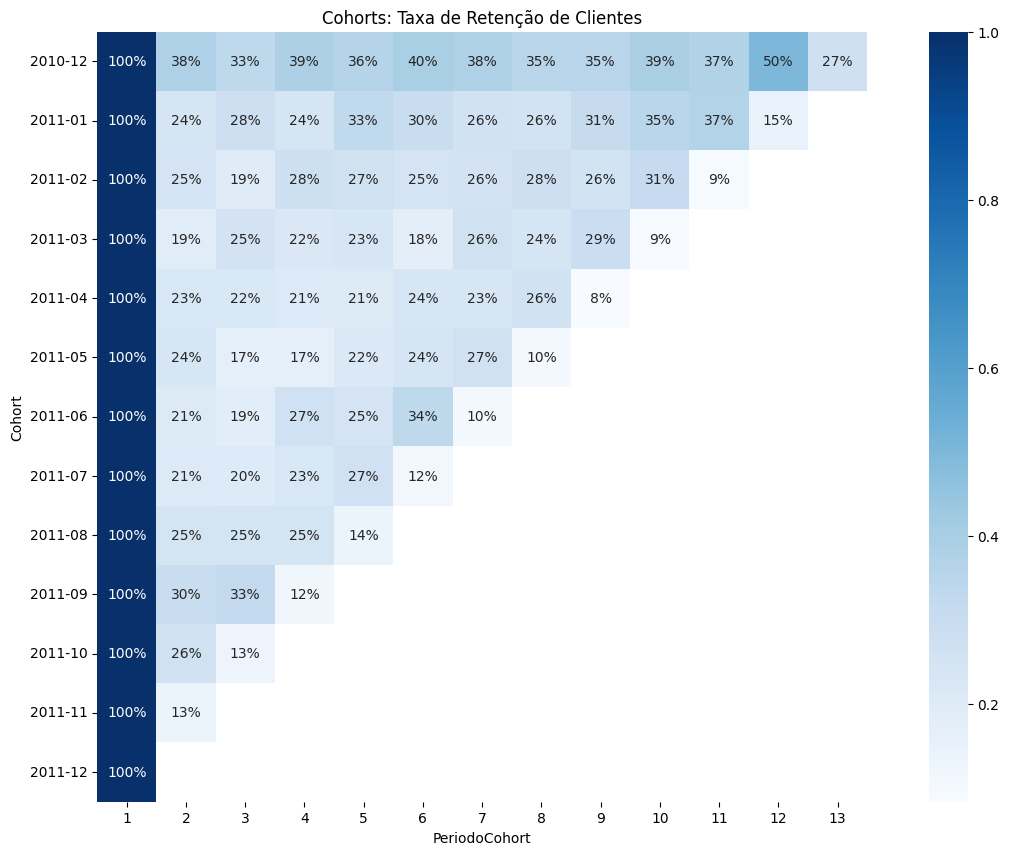

In [94]:
# Plotando a Taxa de Retenção de Clientes
fig, ax = plt.subplots(figsize=(16,10))

plt.title('Cohorts: Taxa de Retenção de Clientes')
sns.heatmap(RetencaoClientes.T, mask=RetencaoClientes.T.isnull(), annot=True, fmt='.0%', ax=ax, square=True,cmap='Blues');
plt.yticks(rotation=0)
plt.show()